In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import missingno as mns

In [3]:
df = pd.read_csv('Big_Black_Money_Dataset.csv')
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [4]:
df.isnull().sum()

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

C:\Users\KPEKPE\AppData\Local\Temp\ipykernel_22136\2580339249.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0],inplace=True)
C:\Users\KPEKPE\AppData\Local\Temp\ipykernel_22136\2580339249.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

<Axes: >

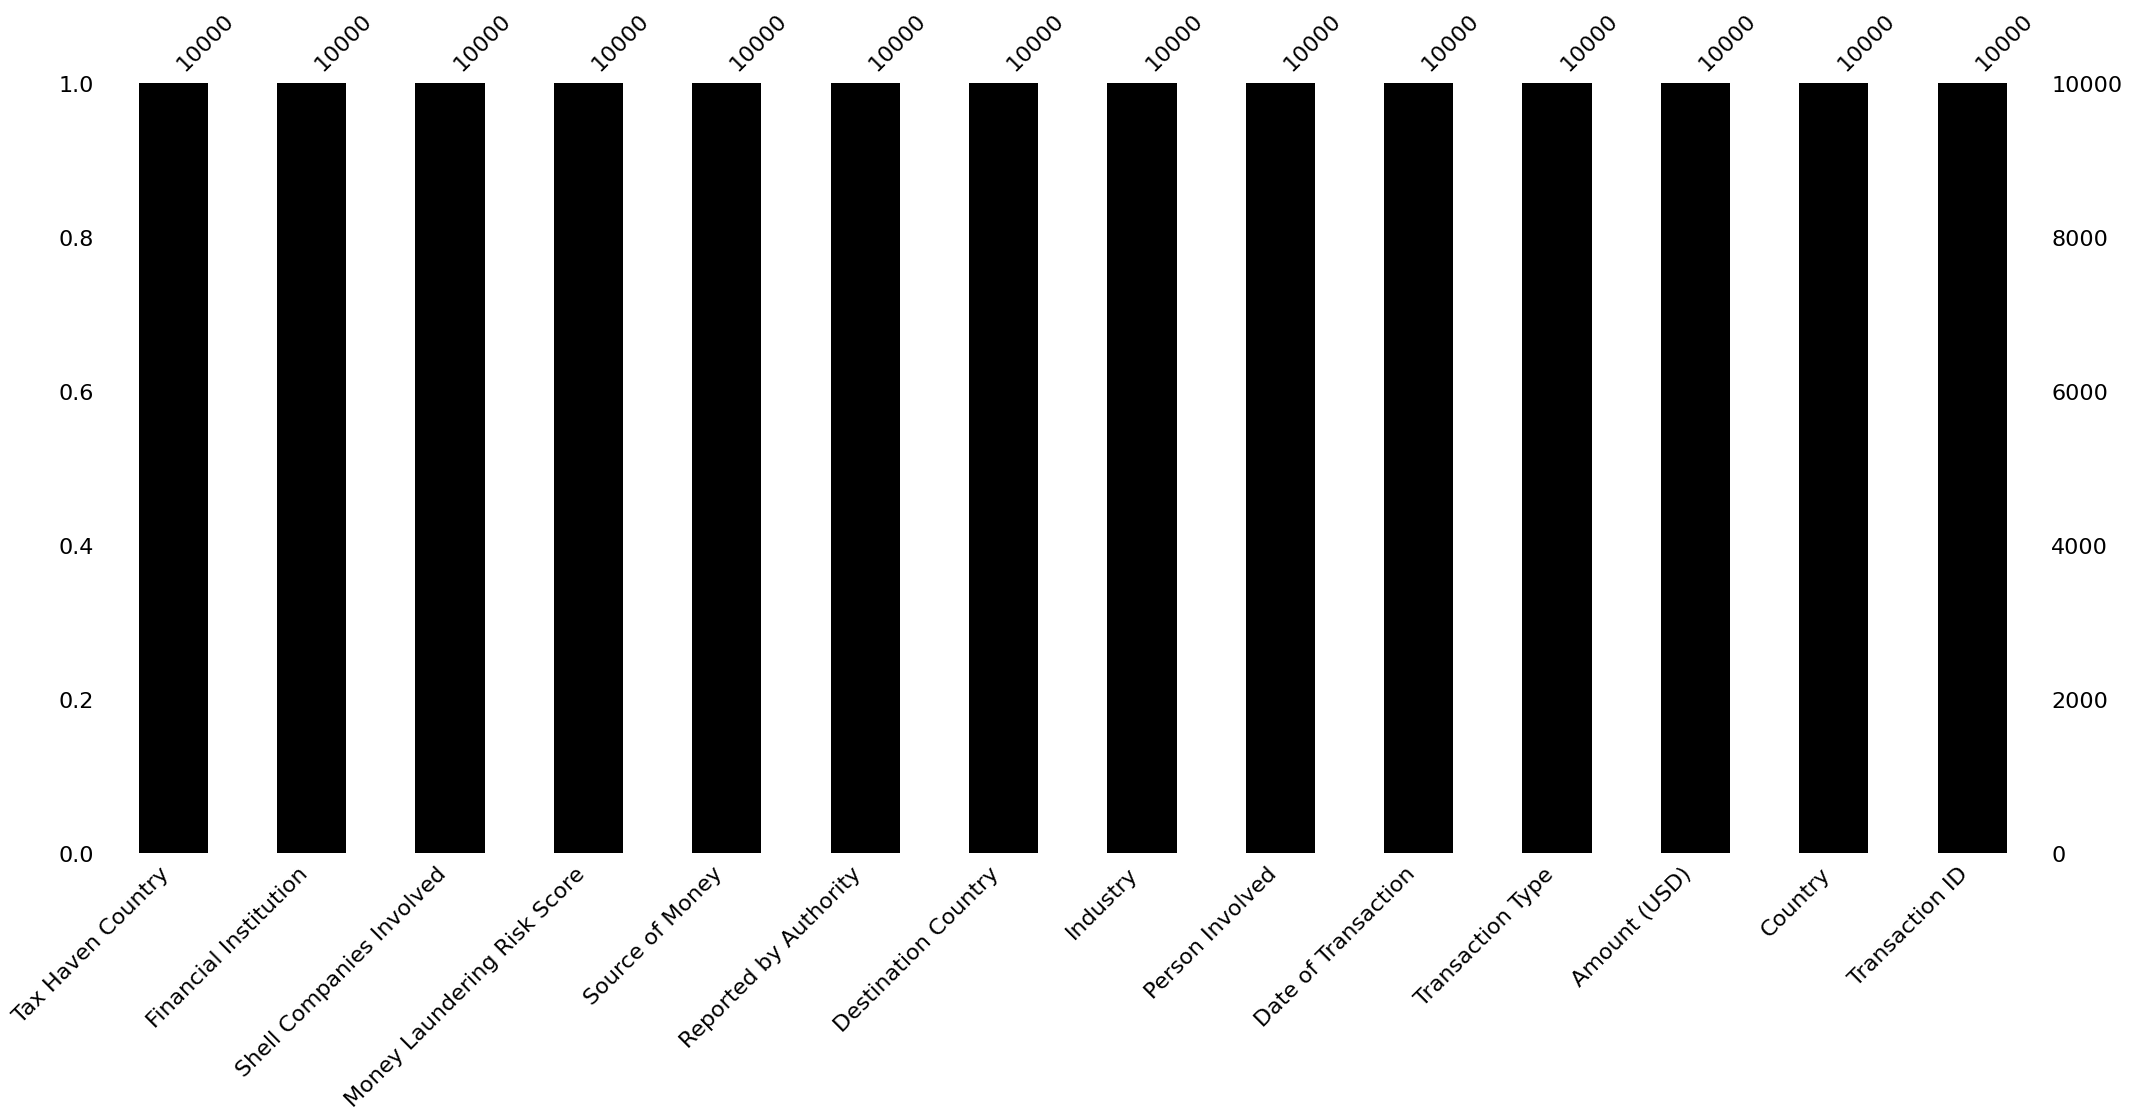

In [5]:
category = df.select_dtypes(include=['object','category'])
numerical = df.select_dtypes(include=['int','float'])
for x in category:
    df[x].fillna(df[x].mode()[0],inplace=True)
for x in numerical:
    df[x].fillna(df[x].mean(),inplace=True)
mns.bar(df, sort='descending',color = 'black')

<Axes: >

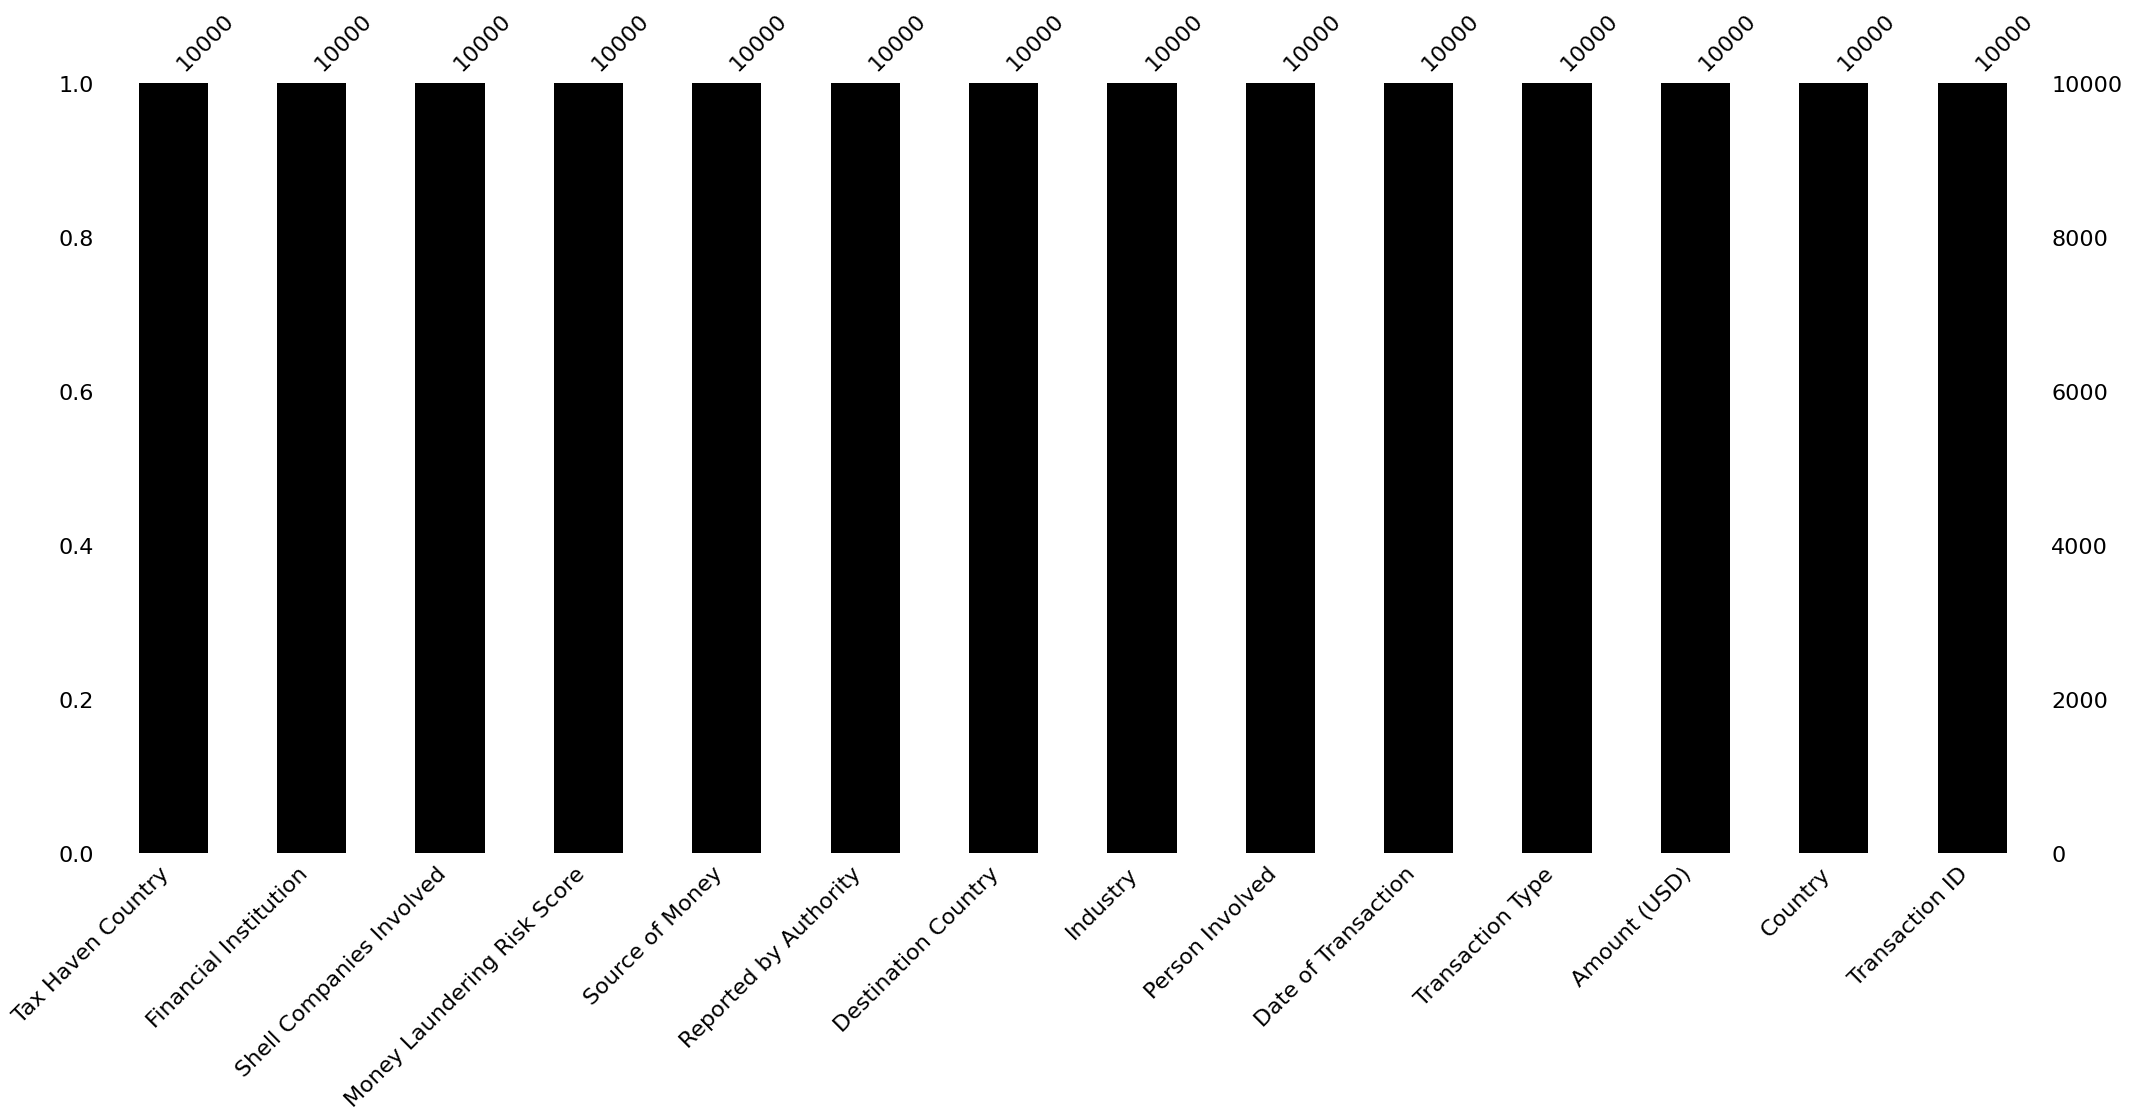

In [6]:
mns.bar(df, sort='descending',color = 'black')

In [7]:
df['Amount (USD)'] = df['Amount (USD)'].astype(int)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3267530,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4965766,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,94167,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,386420,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,643378,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [8]:
mean_amount = df['Amount (USD)'].mean()
median_amount = df['Amount (USD)'].median()
std_dev_amount = df['Amount (USD)'].std()
min_amount = df['Amount (USD)'].min()
max_amount = df['Amount (USD)'].max()
print('Basic Statistics:')
print(f'Mean: {mean_amount:.2f}')
print(f'Median: {median_amount:.2f}')
print(f'Standard Deviation:{std_dev_amount:.2f}')
print(f'Minimum: {min_amount:.2f}')
print(f'Maximum: {max_amount:.2f}')

Basic Statistics:
Mean: 2501817.16
Median: 2501310.00
Standard Deviation:1424364.29
Minimum: 10031.00
Maximum: 4999812.00


In [9]:
from scipy import stats
z_scores = stats.zscore(df['Amount (USD)'])
outlier_z = df['Amount (USD)'][np.abs(z_scores) >3]
print('\nOutlier(Z-score method):')
print(outlier_z)


Outlier(Z-score method):
Series([], Name: Amount (USD), dtype: int64)


In [10]:
q1 = df['Amount (USD)'].quantile(0.25)
q3 = df['Amount (USD)'].quantile(0.75)
iqr = q3 - q1
outlier_iqr = df['Amount (USD)'][(df['Amount (USD)'] < (q1 - 1.5*iqr)) | (df['Amount (USD)'] > (q3 + 1.5*iqr))]
outlier_iqr

Series([], Name: Amount (USD), dtype: int64)

In [11]:
unique_country = df['Country'].nunique()
unique_destination_countries = df['Destination Country'].nunique()
print(unique_country)
print(unique_destination_countries)

10
10


In [12]:
country_counts = df['Country'].value_counts()
destination_country_counts = df['Destination Country'].value_counts()
print(country_counts)
print(destination_country_counts)

Country
China           1038
South Africa    1026
UK              1014
Brazil          1006
Russia           997
Singapore        995
India            990
Switzerland      985
UAE              976
USA              973
Name: count, dtype: int64
Destination Country
USA             1061
Russia          1035
India           1032
Singapore        999
South Africa     989
Switzerland      987
China            986
UK               981
UAE              970
Brazil           960
Name: count, dtype: int64


In [13]:
discrepancies = country_counts[country_counts <5].index.tolist()
destination_discrepancies = destination_country_counts[destination_country_counts < 5].index.tolist()
print(discrepancies)
print(destination_discrepancies)


[]
[]


In [14]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])
df['Transaction Year'] = df['Date of Transaction'].dt.year
df['Transaction Month'] = df['Date of Transaction'].dt.month
df['Transaction Day'] = df['Date of Transaction'].dt.day
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day
0,TX0000000001,Brazil,3267530,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore,2013,1,1
1,TX0000000002,China,4965766,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1
2,TX0000000003,UK,94167,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1
3,TX0000000004,UAE,386420,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1
4,TX0000000005,South Africa,643378,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1


In [15]:
frequent_years = df['Transaction Year'].value_counts().head(5)
print(frequent_years)
frequent_month = df['Transaction Month'].value_counts().head(5)
print(frequent_month)

Transaction Year
2013    8760
2014    1240
Name: count, dtype: int64
Transaction Month
1     1488
2     1168
3      744
5      744
12     744
Name: count, dtype: int64


In [16]:
duplicate_transactions = df['Transaction ID'].duplicated().sum()
print(duplicate_transactions)
duplicates = df[df['Transaction ID'].duplicated(keep=False)]
print(duplicates)

0
Empty DataFrame
Columns: [Transaction ID, Country, Amount (USD), Transaction Type, Date of Transaction, Person Involved, Industry, Destination Country, Reported by Authority, Source of Money, Money Laundering Risk Score, Shell Companies Involved, Financial Institution, Tax Haven Country, Transaction Year, Transaction Month, Transaction Day]
Index: []


In [17]:
transaction_type_count = df['Transaction Type'].value_counts().reset_index()
transaction_type_count.columns = ['Transaction Type', 'Frequency']
industry_count = df['Industry'].value_counts().reset_index()
industry_count.columns = ['Industry', 'Frequency']
print(transaction_type_count)
print(industry_count)

    Transaction Type  Frequency
0  Property Purchase       2086
1    Stocks Transfer       1983
2  Offshore Transfer       1980
3    Cash Withdrawal       1978
4     Cryptocurrency       1973
       Industry  Frequency
0       Finance       1475
1  Construction       1460
2  Luxury Goods       1459
3   Real Estate       1443
4    Arms Trade       1414
5       Casinos       1377
6     Oil & Gas       1372


In [18]:
fig1 = px.bar(transaction_type_count, x='Transaction Type', y='Frequency', title='Transaction Type Frequency')
fig2 = px.bar(industry_count, x='Industry', y='Frequency', title='Industry Frequency')
fig1.show()
fig2.show()

In [19]:
missing_shell_values = df['Shell Companies Involved'].isnull().sum()
missing_shell_values

np.int64(0)

In [20]:
df['Shell Companies Involved'].unique()

array([1, 0, 3, 2, 9, 8, 5, 6, 7, 4])

In [21]:
invalid_shell_values = df['Shell Companies Involved'].apply(lambda x: x < 0 or x > 9).sum()
invalid_shell_values

np.int64(0)

In [22]:
shell_company_transactions = (df['Shell Companies Involved'] >0).sum() / len(df) * 100
shell_company_transactions

np.float64(89.46)

In [23]:
df['Amount (USD)'].value_counts()

Amount (USD)
2830626    2
2929843    2
511746     2
1189535    2
3606929    2
          ..
3845249    1
4503616    1
995315     1
3370227    1
2973516    1
Name: count, Length: 9982, dtype: int64

In [24]:
def create_amount_category(amount):
    if amount < 500000:
        return 'Low'
    elif 500000 <= amount < 2500000:
        return 'Medium'
    else:
        return 'High'
df['Amount Category'] = df['Amount (USD)'].apply(create_amount_category)
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category
0,TX0000000001,Brazil,3267530,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore,2013,1,1,High
1,TX0000000002,China,4965766,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1,High
2,TX0000000003,UK,94167,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1,Low
3,TX0000000004,UAE,386420,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1,Low
4,TX0000000005,South Africa,643378,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1,Medium


In [25]:
transaction_count = df['Amount Category'].value_counts().reset_index()
transaction_count.columns = ['Amount Category', 'Transaction Count']

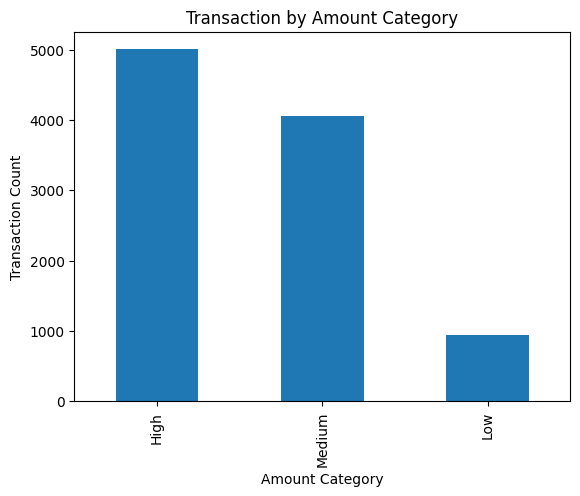

In [26]:
df['Amount Category'].value_counts().plot(kind='bar')
plt.title('Transaction by Amount Category')
plt.xlabel('Amount Category')
plt.ylabel('Transaction Count')
plt.show()
fig = px.bar(transaction_count, x='Amount Category', y='Transaction Count', title='Transacton by Amount Category')
fig.show()

In [27]:
transaction_per_person = df['Person Involved'].value_counts().reset_index()
transaction_per_person.columns = ['Person Involved', 'Transaction Count']
transaction_per_person

,Person Involved,Transaction Count
0,Person_7230,7
1,Person_6424,7
2,Person_7279,6
3,Person_2625,6
4,Person_3310,6
...,...,...
6315,Person_229,1
6316,Person_4276,1
6317,Person_2324,1
6318,Person_5580,1


In [28]:
descriptive_stats = transaction_per_person['Transaction Count'].describe()
descriptive_stats

count   6320.00
mean       1.58
std        0.81
min        1.00
25%        1.00
50%        1.00
75%        2.00
max        7.00
Name: Transaction Count, dtype: float64

In [29]:
fig = px.histogram(transaction_per_person, x='Transaction Count', title='Distribution of Transaction Counts per Person')
fig.show()

In [30]:
df = df.sort_values(by=['Person Involved', 'Date of Transaction'])
df['Time Difference'] = df.groupby('Person Involved')['Date of Transaction'].diff().dt.total_seconds() / 60
df.head()


,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Time Difference
226,TX0000000227,Singapore,3746944,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,9,5,Bank_200,Luxembourg,2013,1,10,High,NaN
5283,TX0000005284,UAE,2200250,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,9,0,Bank_77,Switzerland,2013,8,9,Medium,NaN
9971,TX0000009972,India,3217272,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,1,5,Bank_264,Switzerland,2014,2,20,High,NaN
5281,TX0000005282,USA,534288,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,5,9,Bank_349,Panama,2013,8,9,Medium,NaN
5550,TX0000005551,Singapore,2169574,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,6,7,Bank_440,Cayman Islands,2013,8,20,Medium,NaN


In [31]:
df['Time Difference'] = df['Time Difference'].fillna(0)
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Time Difference
226,TX0000000227,Singapore,3746944,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,9,5,Bank_200,Luxembourg,2013,1,10,High,0.00
5283,TX0000005284,UAE,2200250,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,9,0,Bank_77,Switzerland,2013,8,9,Medium,0.00
9971,TX0000009972,India,3217272,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,1,5,Bank_264,Switzerland,2014,2,20,High,0.00
5281,TX0000005282,USA,534288,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,5,9,Bank_349,Panama,2013,8,9,Medium,0.00
5550,TX0000005551,Singapore,2169574,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,6,7,Bank_440,Cayman Islands,2013,8,20,Medium,0.00


In [32]:
avg_time_diff = df['Time Difference'].mean()
median_time_diff = df['Time Difference'].median
print(avg_time_diff)
print(median_time_diff)

62855.838
<bound method Series.median of 226         0.00
5283        0.00
9971        0.00
5281        0.00
5550        0.00
          ...   
4013   156600.00
9983   358200.00
2997        0.00
4672   100500.00
8729        0.00
Name: Time Difference, Length: 10000, dtype: float64>


In [33]:
df['Tax Haven Country'] = df['Tax Haven Country'].astype(str)
tax_haven_transactions = df[df['Tax Haven Country'].notna()]
tax_haven_transactions

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Time Difference
226,TX0000000227,Singapore,3746944,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,9,5,Bank_200,Luxembourg,2013,1,10,High,0.00
5283,TX0000005284,UAE,2200250,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,9,0,Bank_77,Switzerland,2013,8,9,Medium,0.00
9971,TX0000009972,India,3217272,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,1,5,Bank_264,Switzerland,2014,2,20,High,0.00
5281,TX0000005282,USA,534288,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,5,9,Bank_349,Panama,2013,8,9,Medium,0.00
5550,TX0000005551,Singapore,2169574,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,6,7,Bank_440,Cayman Islands,2013,8,20,Medium,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,TX0000004014,Singapore,2600607,Cash Withdrawal,2013-06-17 05:00:00,Person_9995,Luxury Goods,China,False,Illegal,8,0,Bank_29,Singapore,2013,6,17,High,156600.00
9983,TX0000009984,USA,4105024,Cryptocurrency,2014-02-20 23:00:00,Person_9995,Construction,Brazil,True,Legal,5,5,Bank_284,Bahamas,2014,2,20,High,358200.00
2997,TX0000002998,Switzerland,2727573,Offshore Transfer,2013-05-05 21:00:00,Person_9998,Luxury Goods,China,False,Illegal,2,3,Bank_254,Singapore,2013,5,5,High,0.00
4672,TX0000004673,UK,959663,Stocks Transfer,2013-07-14 16:00:00,Person_9998,Casinos,UK,True,Illegal,2,7,Bank_450,Luxembourg,2013,7,14,Medium,100500.00


In [34]:
num_tax_haven_transactions  = len(tax_haven_transactions)
total_transaction = len(df)

In [35]:
proportion_tax_haven = (num_tax_haven_transactions/ total_transaction)*100
proportion_tax_haven

100.0

In [36]:
df['Risk Index'] = (df['Money Laundering Risk Score'] * 0.6) + (df['Shell Companies Involved'] *0.4)
risk_index_range = df['Risk Index'].max() - df['Risk Index'].min()
average_risk_index = df['Risk Index'].mean()
print(risk_index_range)
print(average_risk_index)

9.0
5.1036


In [37]:
average_risk_by_industry = df.groupby('Industry')['Money Laundering Risk Score'].mean().reset_index()
average_risk_by_industry

,Industry,Money Laundering Risk Score
0,Arms Trade,5.57
1,Casinos,5.56
2,Construction,5.58
3,Finance,5.71
4,Luxury Goods,5.37
5,Oil & Gas,5.43
6,Real Estate,5.46


In [38]:
average_risk_by_industry = average_risk_by_industry.sort_values('Money Laundering Risk Score', ascending=False)
average_risk_by_industry

,Industry,Money Laundering Risk Score
3,Finance,5.71
2,Construction,5.58
0,Arms Trade,5.57
1,Casinos,5.56
6,Real Estate,5.46
5,Oil & Gas,5.43
4,Luxury Goods,5.37


In [39]:
df['High Risk Transaction'] = ((df['Money Laundering Risk Score'] > 7) & (df['Shell Companies Involved'] > 2)).astype(int)
df['High Risk Transaction'] = df['High Risk Transaction'].map({0: 'Low Risk', 1: 'High Risk'})

In [40]:
num_high_risk_transactions = df['High Risk Transaction'].eq('High Risk').sum()
num_high_risk_transactions

np.int64(2115)

In [41]:
percernt_high_risk_transactions = (num_high_risk_transactions / len(df) * 100)
percernt_high_risk_transactions

np.float64(21.15)

In [42]:
transaction_per_year = df['Transaction Year'].value_counts().reset_index()
transaction_per_year.columns = ['Year', 'Transactions']
fig = px.line(transaction_per_year, x='Year', y='Transactions', title='Transaction Trend')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Transactions')
fig.show()

In [43]:
combinations = df.groupby(['Transaction Type','Industry']).size().reset_index(name='Frequency')
combinations = combinations.sort_values('Frequency', ascending=False)
combinations

,Transaction Type,Industry,Frequency
27,Property Purchase,Real Estate,324
17,Offshore Transfer,Finance,319
2,Cash Withdrawal,Construction,318
23,Property Purchase,Construction,311
21,Property Purchase,Arms Trade,303
18,Offshore Transfer,Luxury Goods,301
4,Cash Withdrawal,Luxury Goods,301
24,Property Purchase,Finance,298
20,Offshore Transfer,Real Estate,296
34,Stocks Transfer,Real Estate,291


In [44]:
top_5_combinations = combinations.nlargest(5,'Frequency')
top_5_combinations

,Transaction Type,Industry,Frequency
27,Property Purchase,Real Estate,324
17,Offshore Transfer,Finance,319
2,Cash Withdrawal,Construction,318
23,Property Purchase,Construction,311
21,Property Purchase,Arms Trade,303


In [45]:
country_stats = df.groupby('Country')['Amount (USD)'].agg(['mean', 'median', 'std']).reset_index()
country_stats.columns = ['Country', 'Average Amount', 'Median Amount', 'Standard Deviation']
country_stats = country_stats.sort_values('Average Amount', ascending=False)
country_stats

,Country,Average Amount,Median Amount,Standard Deviation
1,China,2593128.03,2644711.50,1436594.34
6,Switzerland,2517067.28,2592528.00,1428700.96
5,South Africa,2510830.32,2455382.00,1398297.39
4,Singapore,2508387.53,2561970.00,1422814.66
3,Russia,2501650.82,2478250.00,1450927.51
0,Brazil,2498369.75,2465547.50,1423476.27
8,UK,2492822.96,2489680.00,1442968.88
2,India,2492578.15,2518758.00,1411816.52
7,UAE,2490048.96,2442781.50,1435933.19
9,USA,2407058.02,2362195.00,1390337.62


In [46]:
top_5_countries = country_stats.nlargest(5, 'Average Amount')
top_5_countries

,Country,Average Amount,Median Amount,Standard Deviation
1,China,2593128.03,2644711.50,1436594.34
6,Switzerland,2517067.28,2592528.00,1428700.96
5,South Africa,2510830.32,2455382.00,1398297.39
4,Singapore,2508387.53,2561970.00,1422814.66
3,Russia,2501650.82,2478250.00,1450927.51


In [47]:
country_risk_scores = df.groupby('Country')['Money Laundering Risk Score'].mean().reset_index()
country_risk_scores.columns = ['Country', 'Average Risk Score']
country_risk_scores = country_risk_scores.sort_values('Average Risk Score', ascending=False)
country_risk_scores

,Country,Average Risk Score
2,India,5.61
4,Singapore,5.59
0,Brazil,5.58
6,Switzerland,5.56
8,UK,5.54
1,China,5.51
9,USA,5.49
7,UAE,5.48
5,South Africa,5.48
3,Russia,5.43


In [48]:
top_5_risk_score_countries = country_risk_scores.nlargest(5, 'Average Risk Score')
top_5_risk_score_countries

,Country,Average Risk Score
2,India,5.61
4,Singapore,5.59
0,Brazil,5.58
6,Switzerland,5.56
8,UK,5.54


In [49]:
reported_transactions = df[df['Reported by Authority'] == True]
non_reported_transactions = df[df['Reported by Authority'] == False]
fig1 = px.histogram(reported_transactions, x='Amount (USD)', title='Reported Transaction amounts Distribution', nbins=50)
fig1.update_layout(xaxis_title='Amount (USD)', yaxis_title= 'Frequency')
fig1.show()
fig2 = px.histogram(non_reported_transactions, x='Amount (USD)', title='Non-Reported Transaction amounts Distribution', nbins=50)
fig2.update_layout(xaxis_title='Amount (USD)', yaxis_title= 'Frequency')
fig2.show()

In [50]:
reported_transactions = df[df['Reported by Authority'] == True]
percentage_reported = (len(reported_transactions) / len(df)) * 100
reported_avg_amount = reported_transactions['Amount (USD)'].mean()
non_reported_avg_amount = df[~df['Reported by Authority']]['Amount (USD)'].mean()
print(percentage_reported)
print(reported_avg_amount)
print(non_reported_avg_amount)

20.05
2516645.8882793016
2498098.386491557


In [51]:
reported_avg_risk = reported_transactions['Money Laundering Risk Score'].mean()
non_reported_avg_risk = df.loc[~df['Reported by Authority'],'Money Laundering Risk Score'].mean()
print(reported_avg_risk)
print(non_reported_avg_risk)

5.546633416458853
5.521325828642902


In [52]:
from scipy import stats
t_stat, p_val =stats.ttest_ind(reported_transactions['Amount (USD)'], df[~df['Reported by Authority']]['Amount (USD)'])
print(f"\nt-test results: t-statistics={t_stat:.2f}, p-value={p_val:.4f}")


t-test results: t-statistics=0.52, p-value=0.6021


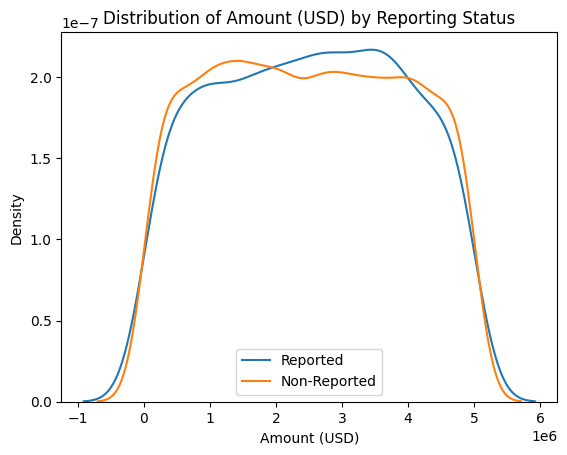

In [53]:
sns.kdeplot(reported_transactions['Amount (USD)'], label='Reported')
sns.kdeplot(df[~df['Reported by Authority']]['Amount (USD)'], label='Non-Reported')
plt.xlabel('Amount (USD)')
plt.ylabel('Density')
plt.title('Distribution of Amount (USD) by Reporting Status')
plt.legend()
plt.show()

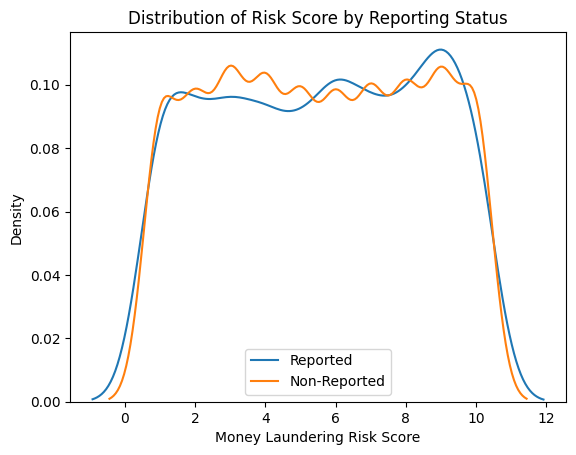

In [54]:
sns.kdeplot(reported_transactions['Money Laundering Risk Score'], label='Reported')
sns.kdeplot(df[~df['Reported by Authority']]['Money Laundering Risk Score'], label='Non-Reported')
plt.xlabel('Money Laundering Risk Score')
plt.ylabel('Density')
plt.title('Distribution of Risk Score by Reporting Status')
plt.legend()
plt.show()

In [55]:
industry_counts = df['Industry'].value_counts().nlargest(5)
industry_counts

Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Name: count, dtype: int64

In [56]:
fig = px.bar(x=industry_counts.index, y=industry_counts.values, title='Top 5 Industries by Transaction Frequency')
fig.show()

In [57]:
industry_stats = df.groupby('Industry')[['Amount (USD)', 'Money Laundering Risk Score']].mean().nlargest(5, 'Amount (USD)')
industry_stats

,Amount (USD),Money Laundering Risk Score
Industry,,
Arms Trade,2546361.61,5.57
Construction,2538176.46,5.58
Finance,2532828.44,5.71
Casinos,2482549.80,5.56
Real Estate,2478125.57,5.46


In [58]:
fig1 = px.bar(industry_stats, x=industry_stats.index, y='Amount (USD)', title='Average Amount (USD) by Industry')
fig1.show()
fig2 = px.bar(industry_stats, x=industry_stats.index, y='Money Laundering Risk Score', title='Average Risk Score by Industry')
fig2.show()

In [59]:
transaction_type_stats = df.groupby('Transaction Type')[['Amount (USD)']].agg(['mean', 'median']).reset_index()
transaction_type_stats.columns = ['Transaction Type', 'Average Amount', 'Median Amount']
transaction_type_stats.sort_values('Average Amount', ascending=False)

,Transaction Type,Average Amount,Median Amount
2,Offshore Transfer,2527692.39,2515102.00
1,Cryptocurrency,2521128.75,2551082.00
0,Cash Withdrawal,2507550.62,2524110.50
4,Stocks Transfer,2504994.77,2546576.00
3,Property Purchase,2450533.98,2374723.50


In [60]:
fig = px.bar(transaction_type_stats, x='Transaction Type', y='Average Amount', title='Top Transaction Types by Average Amount')
fig.show()

In [61]:
Illegal_transactions = df[df['Source of Money'] == 'Illegal']
proportion_illegal = len(Illegal_transactions) / len(df)
print(f"Proportion of transctions involving illegal sourcez: {proportion_illegal*100:.2f}%")

Proportion of transctions involving illegal sourcez: 70.17%


In [62]:
country_illegal_proportion = df.groupby('Country')['Source of Money'].apply(lambda x: (x=='Illegal').mean()).reset_index()

In [63]:
country_illegal_proportion.columns = ['Country', 'Proportion of Illegal Transactions']
country_illegal_proportion = country_illegal_proportion.sort_values('Proportion of Illegal Transactions', ascending=False)
country_illegal_proportion

,Country,Proportion of Illegal Transactions
0,Brazil,0.74
5,South Africa,0.71
3,Russia,0.70
2,India,0.70
7,UAE,0.70
8,UK,0.70
6,Switzerland,0.70
4,Singapore,0.69
9,USA,0.69
1,China,0.68


In [64]:
fig = px.bar(country_illegal_proportion, x='Country', y='Proportion of Illegal Transactions', title='Top Countries by Porportion of Illegal Transactions')
fig.update_layout(yaxis_ticksuffix='%')
fig.show()

In [65]:
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,...,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Time Difference,Risk Index,High Risk Transaction
226,TX0000000227,Singapore,3746944,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,...,5,Bank_200,Luxembourg,2013,1,10,High,0.00,7.40,High Risk
5283,TX0000005284,UAE,2200250,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,...,0,Bank_77,Switzerland,2013,8,9,Medium,0.00,5.40,Low Risk
9971,TX0000009972,India,3217272,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,...,5,Bank_264,Switzerland,2014,2,20,High,0.00,2.60,Low Risk
5281,TX0000005282,USA,534288,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,...,9,Bank_349,Panama,2013,8,9,Medium,0.00,6.60,Low Risk
5550,TX0000005551,Singapore,2169574,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,...,7,Bank_440,Cayman Islands,2013,8,20,Medium,0.00,6.40,Low Risk


In [78]:
df_grouped = df.groupby('Shell Companies Involved').agg({'Money Laundering Risk Score':'mean', 'Transaction ID':'count'}).reset_index()
df_grouped.columns = ['Number of Shell Companies', 'Average Risk Score', 'Number of Transactions']
df_grouped

,Number of Shell Companies,Average Risk Score,Number of Transactions
0,0,5.62,1054
1,1,5.70,990
2,2,5.55,1000
3,3,5.48,979
4,4,5.36,995
5,5,5.59,1029
6,6,5.47,995
7,7,5.59,982
8,8,5.57,986
9,9,5.33,990


In [79]:
fig1 = px.bar(df_grouped, x='Number of Shell Companies', y='Number of Transactions', title='Number of Transactions')
fig2 = px.bar(df_grouped, x='Number of Shell Companies', y='Average Risk Score', title='Average Risk SCore')
fig1.show()
fig2.show()

In [70]:
df['Is Tax Haven'] = df['Country'].isin(df['Tax Haven Country'].unique())
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,...,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Time Difference,Risk Index,High Risk Transaction,Is Tax Haven
226,TX0000000227,Singapore,3746944,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,...,Bank_200,Luxembourg,2013,1,10,High,0.00,7.40,High Risk,True
5283,TX0000005284,UAE,2200250,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,...,Bank_77,Switzerland,2013,8,9,Medium,0.00,5.40,Low Risk,False
9971,TX0000009972,India,3217272,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,...,Bank_264,Switzerland,2014,2,20,High,0.00,2.60,Low Risk,False
5281,TX0000005282,USA,534288,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,...,Bank_349,Panama,2013,8,9,Medium,0.00,6.60,Low Risk,False
5550,TX0000005551,Singapore,2169574,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,...,Bank_440,Cayman Islands,2013,8,20,Medium,0.00,6.40,Low Risk,True


In [73]:
tax_haven_df = df[df['Is Tax Haven']]
non_tax_haven_df = df[~df['Is Tax Haven']]
tax_haven_avg = tax_haven_df['Amount (USD)'].mean()
tax_haven_median = tax_haven_df['Amount (USD)'].median()
non_tax_haven_avg = non_tax_haven_df['Amount (USD)'].mean()
non_tax_haven_median = non_tax_haven_df['Amount (USD)'].median()
print("Average Amount (USD):")
print(f"Tax Haven: ${tax_haven_avg:,.2f}")
print(f"Non-Tax Haven: ${non_tax_haven_avg:,.2f}")
print()
print("Median Amount (USD):")
print(f"Tax HAven: ${tax_haven_median:,.2f}")
print(f"Non-Tax Haven: ${non_tax_haven_median:,.2f}")

Average Amount (USD):
Tax Haven: $2,512,705.49
Non-Tax Haven: $2,499,129.02

Median Amount (USD):
Tax HAven: $2,574,905.50
Non-Tax Haven: $2,492,855.00


In [74]:
from scipy.stats import ttest_ind, mannwhitneyu
t_test_result = ttest_ind(tax_haven_df['Amount (USD)'], non_tax_haven_df['Amount (USD)'])
mw_test_result = mannwhitneyu(tax_haven_df['Amount (USD)'], non_tax_haven_df['Amount (USD)'])

print("\nSignificance Tests:")
print(f"T-Test: p-value = {t_test_result.pvalue:.4f}")
print(f"Mann-Whitney U Test: p-value = {mw_test_result.pvalue:.4f}")



Significance Tests:
T-Test: p-value = 0.7041
Mann-Whitney U Test: p-value = 0.6994


In [75]:
alpha = 0.05
if t_test_result.pvalue < alpha or mw_test_result.pvalue < alpha:
    print("\nConclusion: The difference in average/median transaction amounts is statistically significant.")
else:
    print("\nConclusion: The difference in average/median transaction amounts is not statistically sigificant.")


Conclusion: The difference in average/median transaction amounts is not statistically sigificant.


In [80]:
corr_df = df[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']]
corr_matrix = corr_df.corr()

In [81]:
fig = px.imshow(corr_matrix, text_auto=True, aspect="auto")
fig.update_layout(title='Correlation Matrix', width=800, height=700)
fig.show()

In [82]:
fig1 = px.scatter(df, x='Amount (USD)', y='Money Laundering Risk Score', trendline='ols')
fig1.update_layout(title='Amount (USD) vs Money Laundering Risk Score')
fig1.show()
fig2 = px.scatter(df, x='Amount (USD)', y='Shell Companies Involved', trendline='ols')
fig2.update_layout(title='Amount (USD) vs Shell Companies Involved')
fig2.show()
fig3 = px.scatter(df, y='Shell Companies Involved', x='Money Laundering Risk Score', trendline='ols')
fig3.update_layout(title='Money Laundering Risk Score vs Shell Companies Involved')
fig3.show()